<a href="https://colab.research.google.com/github/asgutierrt/Introduction_to_IA/blob/main/unsupervised/notebooks/no_supervisado_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run ONCE (only in Colab)
#!git clone https://github.com/asgutierrt/Introduction_to_IA.git
#curr_path="/content/Introduction_to_IA/unsupervised/src"

In [1]:
from pathlib import Path
import os
import plotly.io as pio
import numpy as np

# to import from src folder
try:
    os.chdir(curr_path)
    # custom visualization: colab only
    pio.renderers.default='colab'
    !pip install umap-learn
except:
    pio.renderers.default='vscode' # other renderers: 'browser', 'jupyterlab', 'notebook'


%load_ext autoreload
%autoreload 2

from modules.cluster_object import ClusterProblem
from modules.cluster_algorithms import naive_boxes, naive_kn
from modules.visualizations import plot_clusters
from modules.support_functions import encode_array

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
results_path= os.path.join('..','notebooks','dev_reports','group_matrix')
figs_path= os.path.join('..','notebooks','dev_reports','figures')
filename='billionaires.csv' #'water_potability.txt' #'iris' #
normas=['euclidea','mahalanobis','coseno','manhattan','Lp=3']

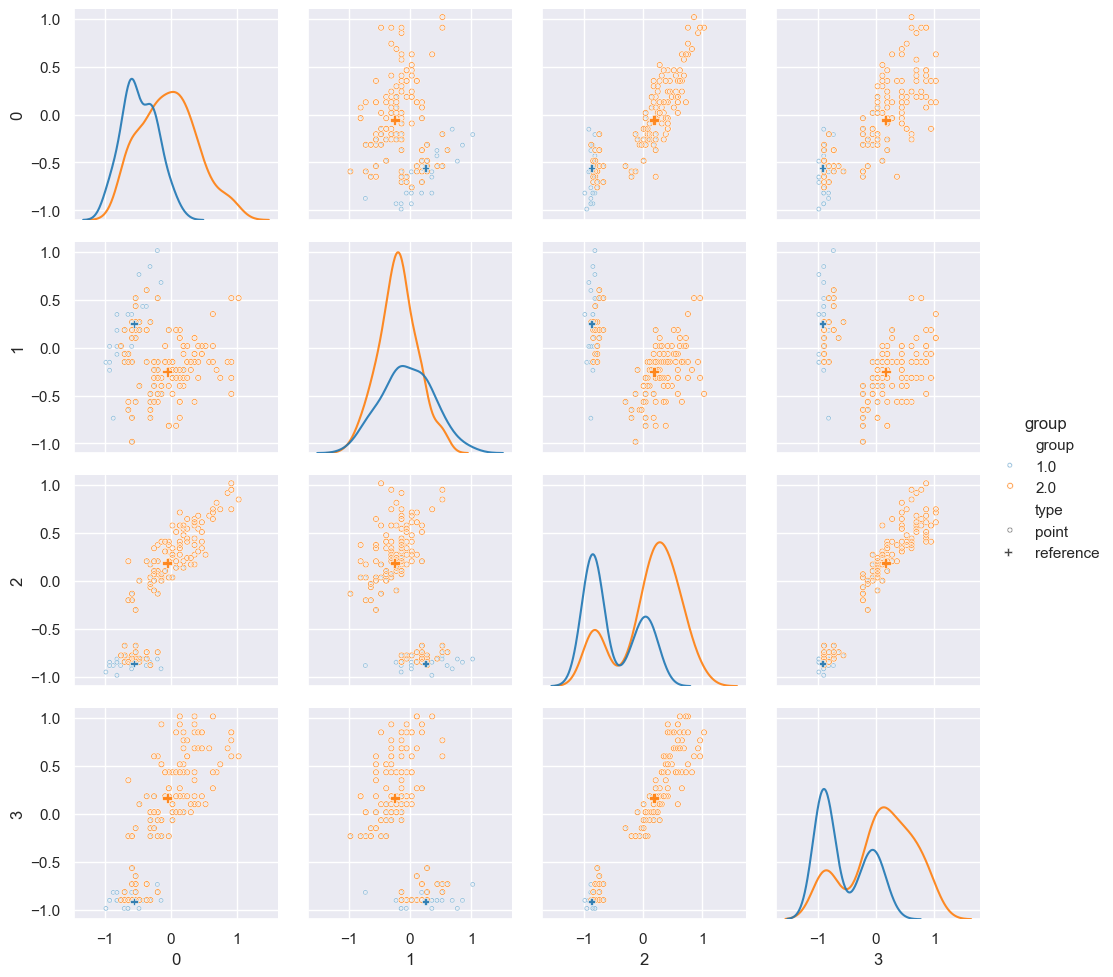

In [46]:
pipe=ClusterProblem(results_path,figs_path,'iris',x_treatment='original',normas=normas)
# 1. Naive boxes clustering
G, G_ref_points = pipe.do_cluster(naive_boxes, n_groups=2)

norma_i=0
fig=plot_clusters(X=pipe.X,G=G[norma_i],ref_points=pipe.X[G_ref_points[norma_i],:],grid=None)

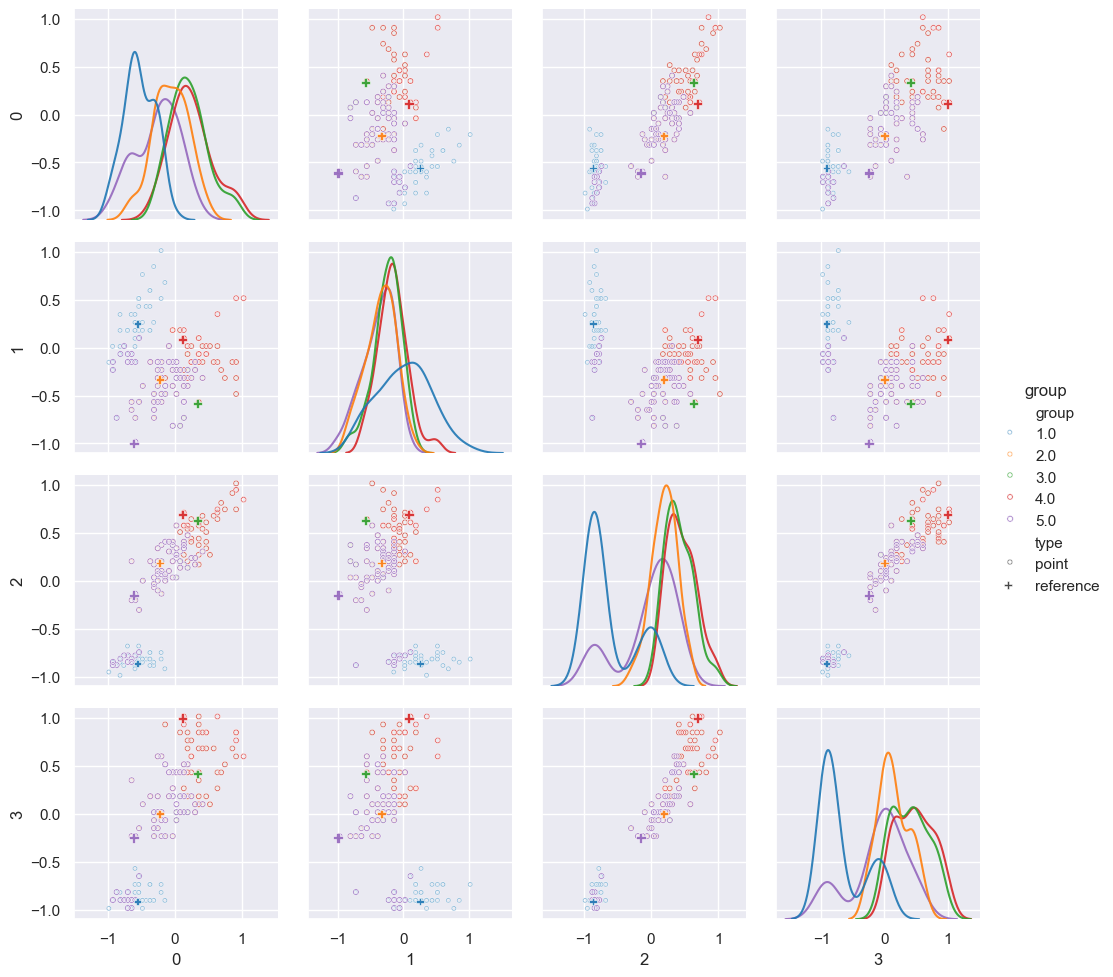

In [47]:
G, G_ref_points = pipe.do_cluster(naive_kn, k_n=70)

norma_i=0
fig=plot_clusters(X=pipe.X,G=G[norma_i],ref_points=pipe.X[G_ref_points[norma_i],:],grid=None)

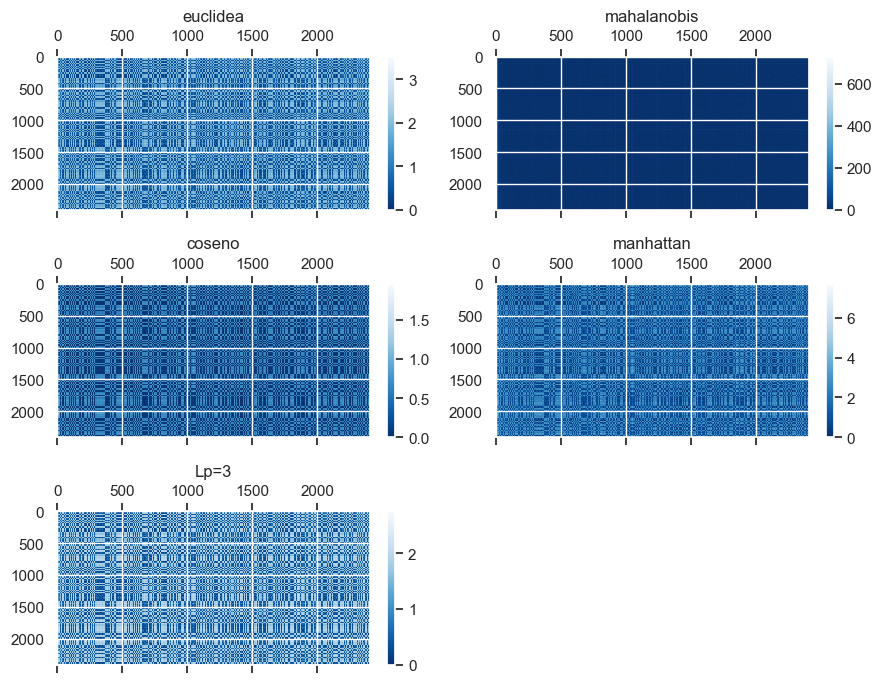

In [52]:
pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='original',normas=normas)
pipe.plot_distances(pipe.D_XToX)

k_n                         \
                                        n_clusters         davies bouldin   
metric      density algorithm ra                                            
coseno      mountain          0.608382           2  147185131918253.40625   
            substractive      0.304191           3               0.389509   
            mountain          0.030419          97  17777045005437.582031   
manhattan   substractive      12.411925          2               0.680141   
coseno      mountain          0.050699          73   6323567684221.681641   
mahalanobis substractive      3.117107           4               0.929412   

                                                                     \
                                             dunn calinski-harabasz   
metric      density algorithm ra                                      
coseno      mountain          0.608382   0.001196          0.014573   
            substractive      0.304191   0.000118          0.007014   
            mountain          0.030419        0.0          0.000185   
manhattan   substractive      12.411925  0.089258          0.004742   
coseno      mountain          0.050699        0.0          0.000095   
mahalanobis substractive      3.117107   0.000732           2.66542   

                                               c_n                        \
                                        n_clusters        davies bouldin   
metric      density algorithm ra                                           
coseno      mountain          0.608382           2  312856453076895.6875   
            substractive      0.304191           3  89497187393033.03125   
            mountain          0.030419          31  71936799632292.28125   
manhattan   substractive      12.411925          2              0.604798   
coseno      mountain          0.050699          31    180548996644162.25   
mahalanobis substractive      3.117107           4               2.44211   

                                                                     
                                             dunn calinski-harabasz  
metric      density algorithm ra                                     
coseno      mountain          0.608382   0.001179          0.014702  
            substractive      0.304191   0.001295          0.004884  
            mountain          0.030419   0.002453          0.100131  
manhattan   substractive      12.411925  0.005468          0.000623  
coseno      mountain          0.050699   0.003866          0.206527  
mahalanobis substractive      3.117107   0.000065          1.588824

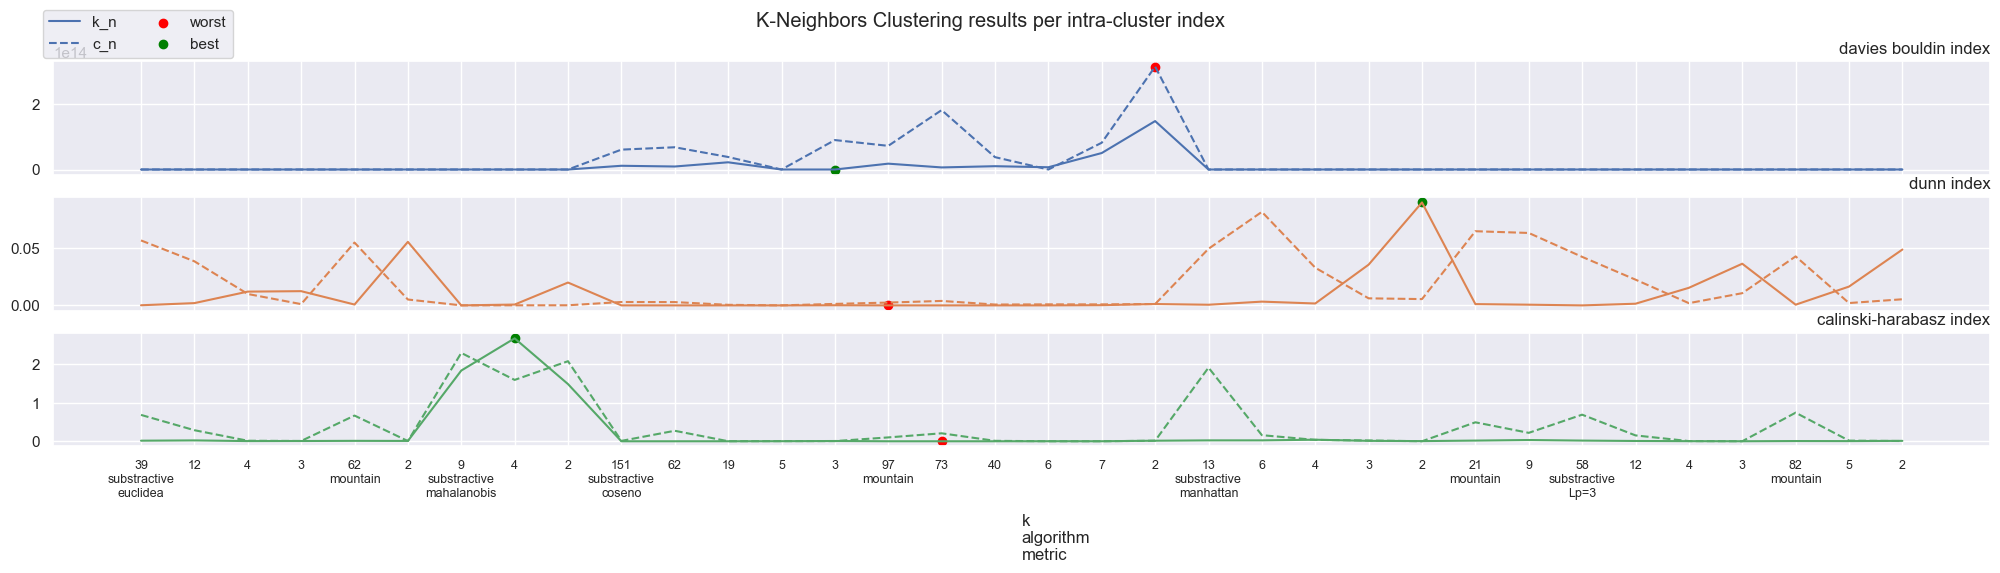

In [13]:
pipe.do_ClusterPipeline()
indices,fig=pipe.plot_results()
display(pipe.results.iloc[[ind[0] for ind in indices]].drop('matrix results',axis=1,level=1).drop_duplicates())

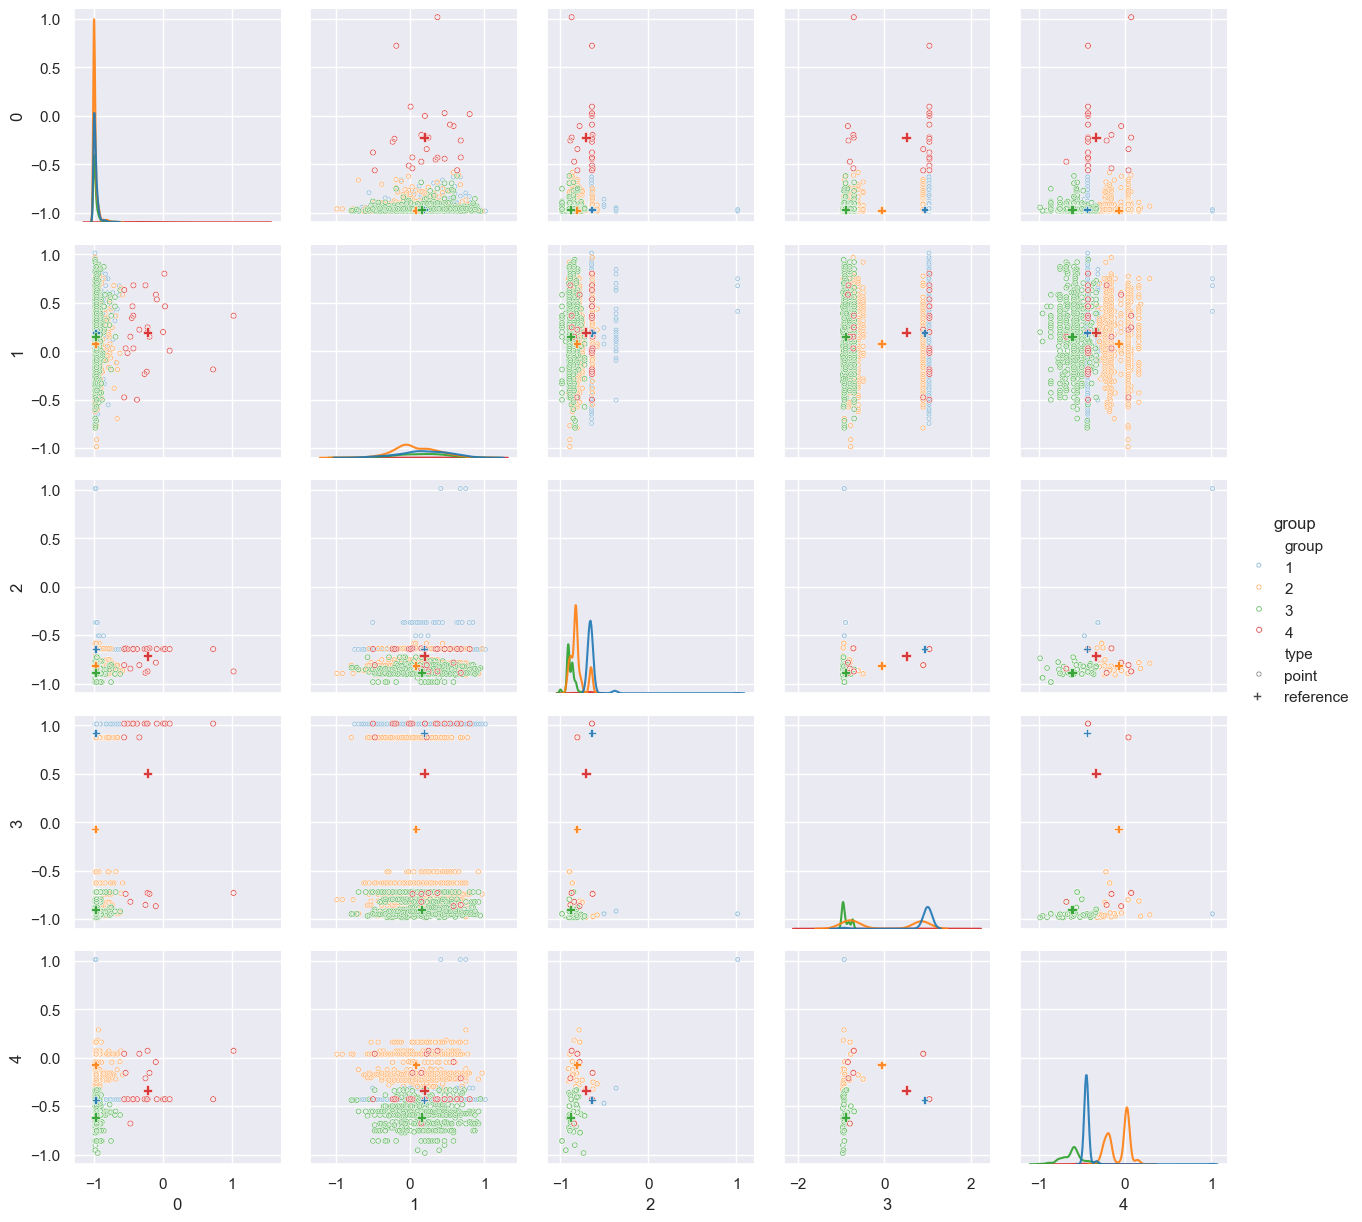

In [15]:
from modules.visualizations import plot_clusters

plot_results_by=indices[-1]
cluster_id={0:'k_n',1:'c_n'}
G, ref_points=pipe.results.iloc[plot_results_by[0]].loc[cluster_id[plot_results_by[1]],'matrix results']
fig=plot_clusters(X=pipe.X,G=G,ref_points=ref_points,grid=None)

encoder MLP information
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 36        
                                                                 
 dense_1 (Dense)             (None, 7)                 49        
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 85 (340.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
decoder MLP information
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 5)                 35        
           

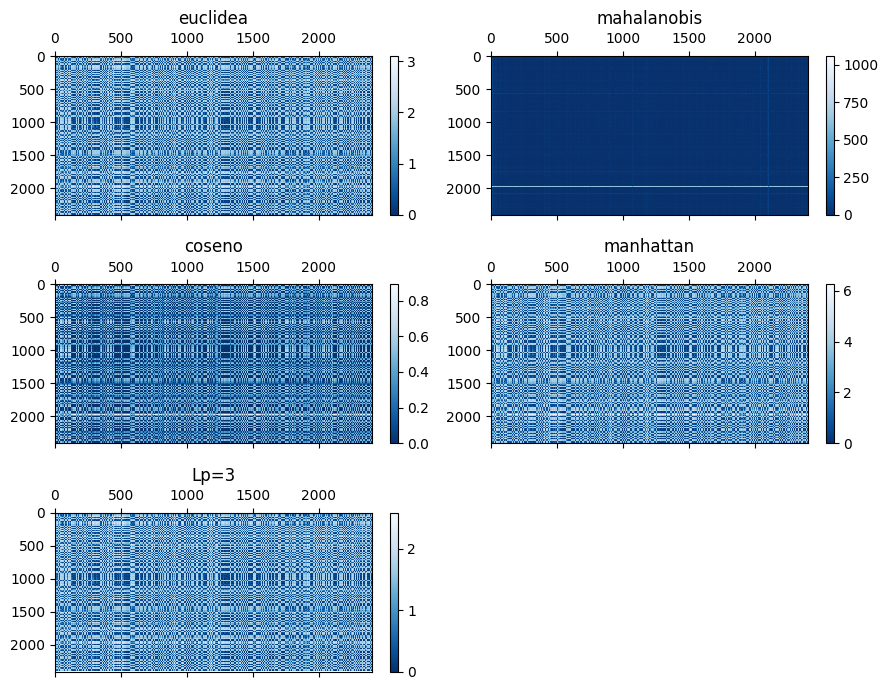

In [4]:
pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='encoded',normas=normas)
pipe.do_grid(n_intervals=None)
pipe.plot_distances(pipe.D_XToX)

calculating for norm euclidea
calculating for norm mahalanobis
calculating for norm coseno
calculating for norm manhattan
calculating for norm Lp=3


k_n                           \
                                       n_clusters davies bouldin      dunn   
metric      density algorithm ra                                             
coseno      substractive      0.145591          4  205342.709205  0.000085   
                              0.436774          2       0.149766  0.000083   
                              0.021839        198    8697.644679      -0.0   
mahalanobis substractive      4.334208          2       3.436317  0.058748   
                              2.600525          7       1.963734  0.000429   

                                                                c_n  \
                                       calinski-harabasz n_clusters   
metric      density algorithm ra                                      
coseno      substractive      0.145591          0.003312          4   
                              0.436774          0.009135          2   
                              0.021839          0.000029         91   
mahalanobis substractive      4.334208          6.037185          2   
                              2.600525          7.068504          7   

                                                                       \
                                             davies bouldin      dunn   
metric      density algorithm ra                                        
coseno      substractive      0.145591    995556990375179.5  0.000059   
                              0.436774             0.157344  0.000084   
                              0.021839  377759684763239.625  0.000152   
mahalanobis substractive      4.334208             2.152673  0.000051   
                              2.600525             3.636614  0.000165   

                                                          
                                       calinski-harabasz  
metric      density algorithm ra                          
coseno      substractive      0.145591          0.039574  
                              0.436774          0.007941  
                              0.021839          0.210698  
mahalanobis substractive      4.334208          4.426974  
                              2.600525          2.833465

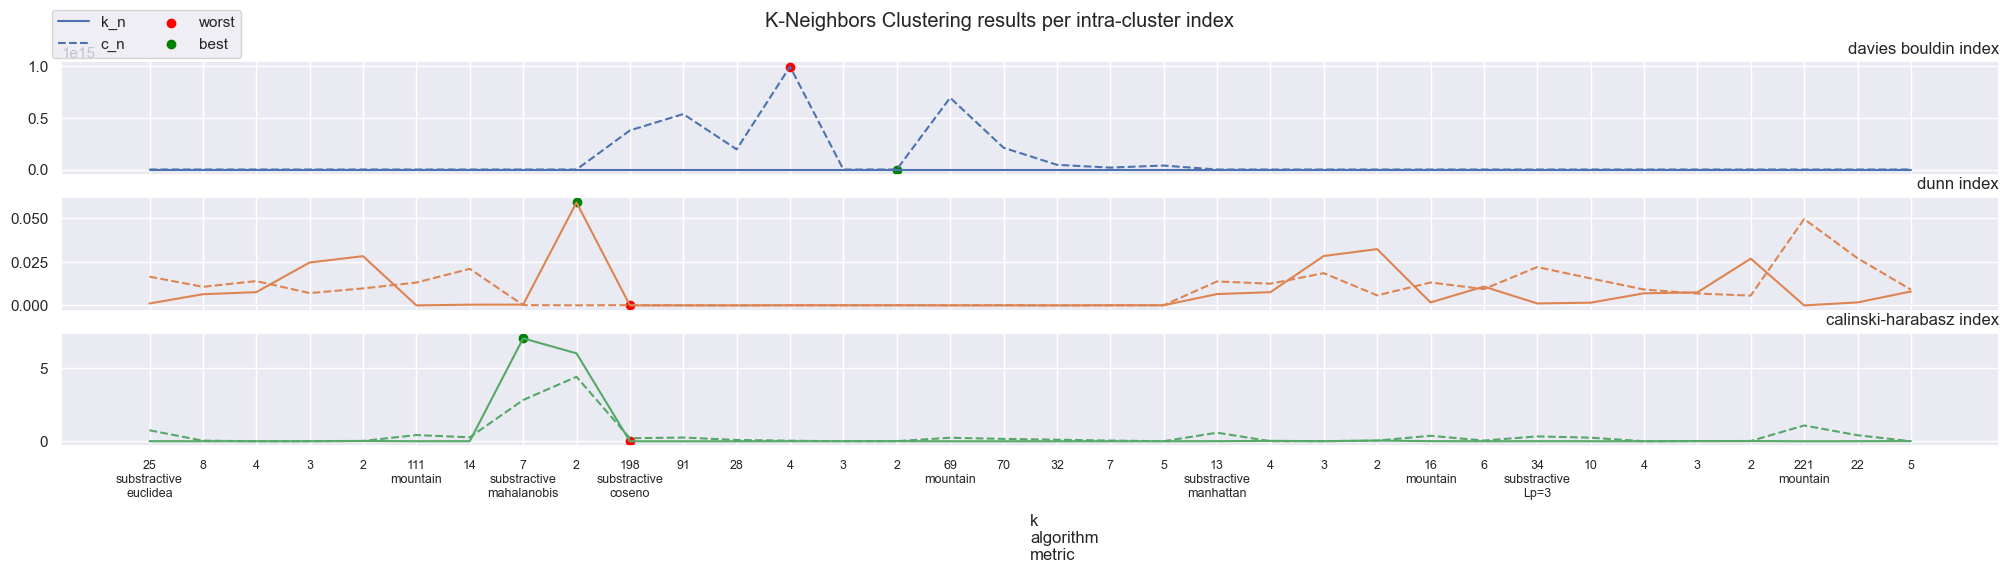

In [5]:
pipe.do_ClusterPipeline()
indices,fig=pipe.plot_results()
display(pipe.results.iloc[[ind[0] for ind in indices]].drop('matrix results',axis=1,level=1).drop_duplicates())

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



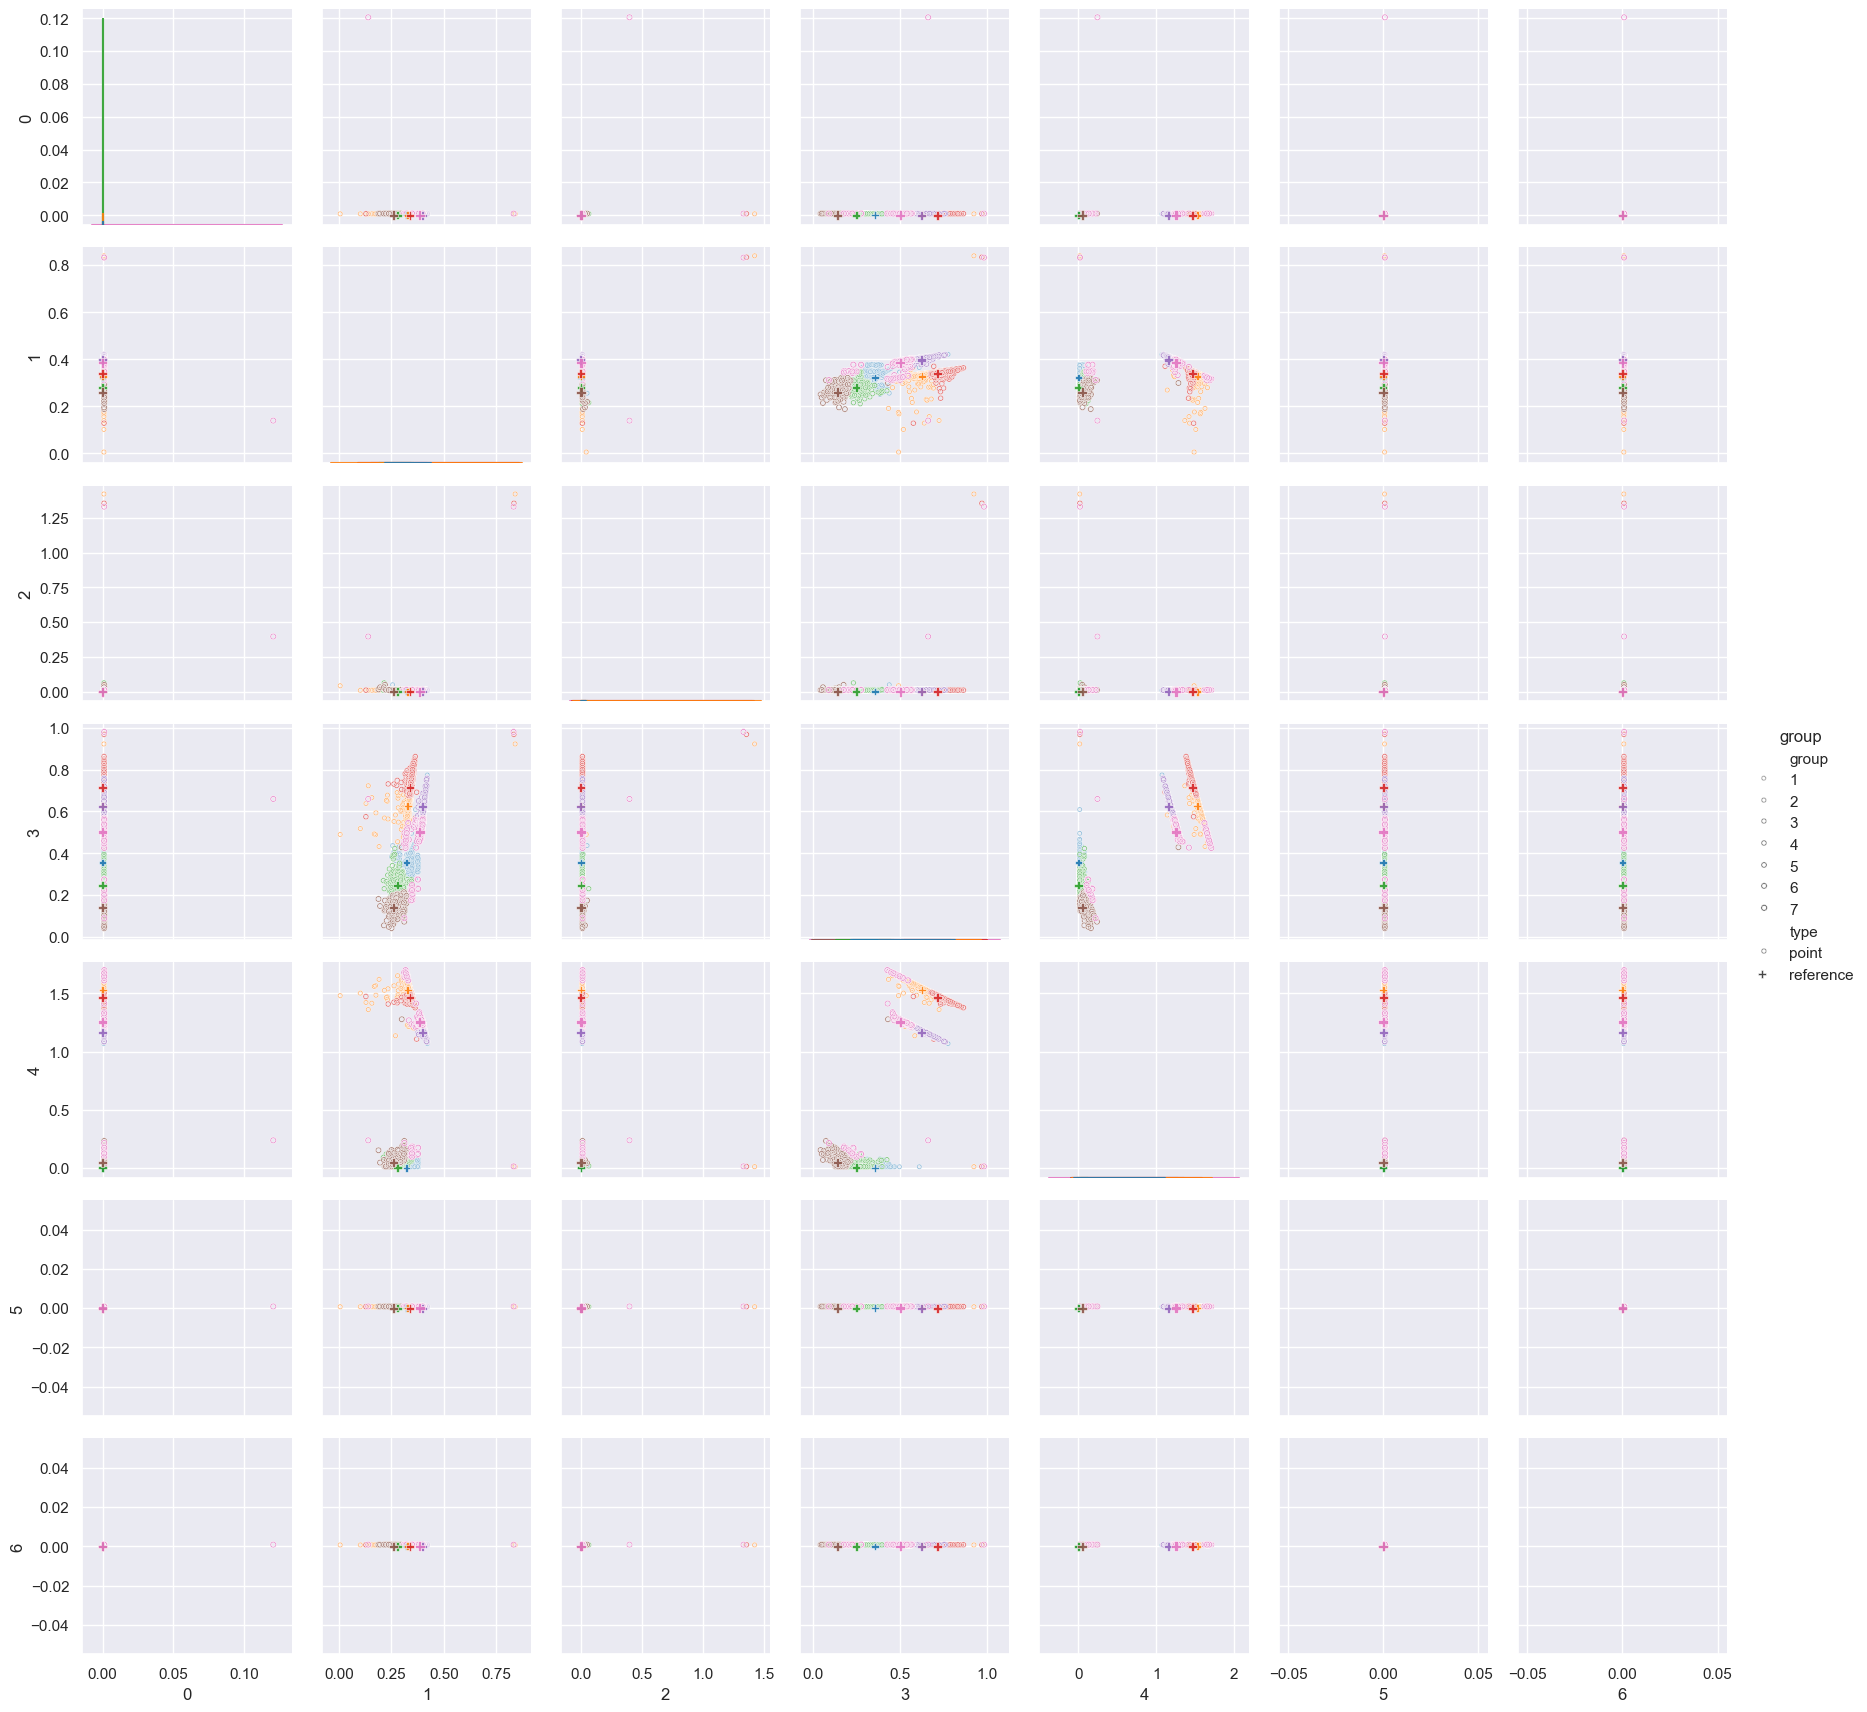

In [19]:
plot_results_by=indices[-1]

cluster_id={0:'k_n',1:'c_n'}
G, ref_points=pipe.results.iloc[plot_results_by[0]].loc[cluster_id[plot_results_by[1]],'matrix results']
fig=plot_clusters(X=pipe.X,G=G,ref_points=ref_points,grid=None)

calculating umap embedding


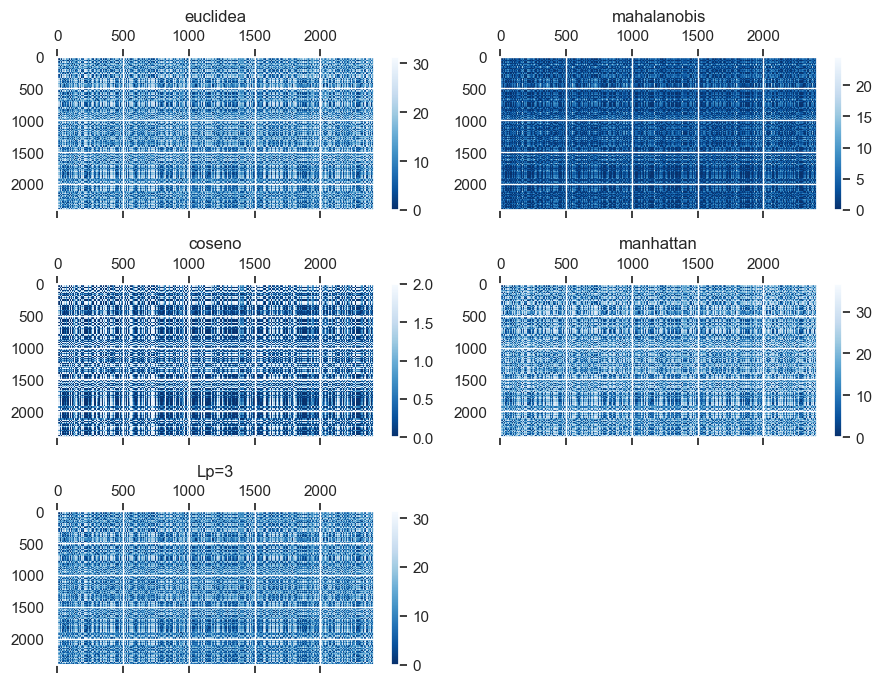

In [20]:
pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='umap',normas=normas)
pipe.do_grid(n_intervals=None)
pipe.plot_distances(pipe.D_XToX)

calculating for norm euclidea
calculating for norm mahalanobis
calculating for norm coseno
calculating for norm manhattan
calculating for norm Lp=3


k_n                            \
                                       n_clusters  davies bouldin      dunn   
metric      density algorithm ra                                              
coseno      substractive      0.416383          3  1632632.392835       0.0   
                              0.832766          2        0.287995       0.0   
            mountain          0.208191          8    19505.161819      -0.0   
manhattan   mountain          4.482606          4        0.624076  0.052496   
mahalanobis substractive      0.750479          6        0.300567  0.001014   
manhattan   substractive      4.482606          3        0.768919  0.010263   

                                                                c_n  \
                                       calinski-harabasz n_clusters   
metric      density algorithm ra                                      
coseno      substractive      0.416383           0.00986          3   
                              0.832766          0.018974          2   
            mountain          0.208191          0.004437          8   
manhattan   mountain          4.482606          0.397168          4   
mahalanobis substractive      0.750479          0.005624          6   
manhattan   substractive      4.482606          0.504396          3   

                                                                        \
                                              davies bouldin      dunn   
metric      density algorithm ra                                         
coseno      substractive      0.416383   643241886513931.875       0.0   
                              0.832766              0.885709       0.0   
            mountain          0.208191  164175332215949.5625       0.0   
manhattan   mountain          4.482606              1.385546  0.003695   
mahalanobis substractive      0.750479              1.178301  0.000021   
manhattan   substractive      4.482606              1.591075  0.002809   

                                                          
                                       calinski-harabasz  
metric      density algorithm ra                          
coseno      substractive      0.416383           0.01313  
                              0.832766          0.049202  
            mountain          0.208191          0.128904  
manhattan   mountain          4.482606          0.806325  
mahalanobis substractive      0.750479          0.001509  
manhattan   substractive      4.482606          1.276695

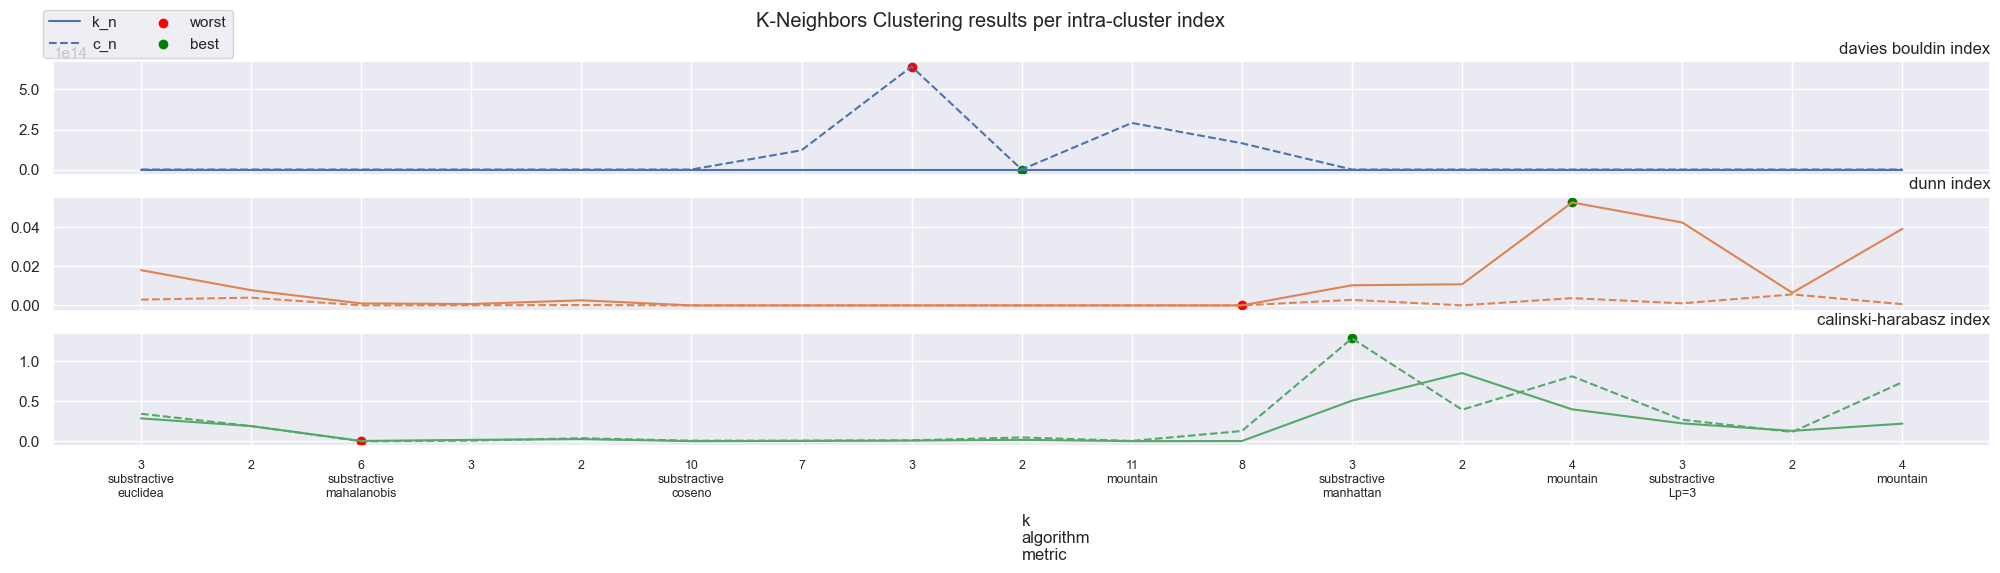

In [21]:
pipe.do_ClusterPipeline()
indices,fig=pipe.plot_results()
display(pipe.results.iloc[[ind[0] for ind in indices]].drop('matrix results',axis=1,level=1).drop_duplicates())

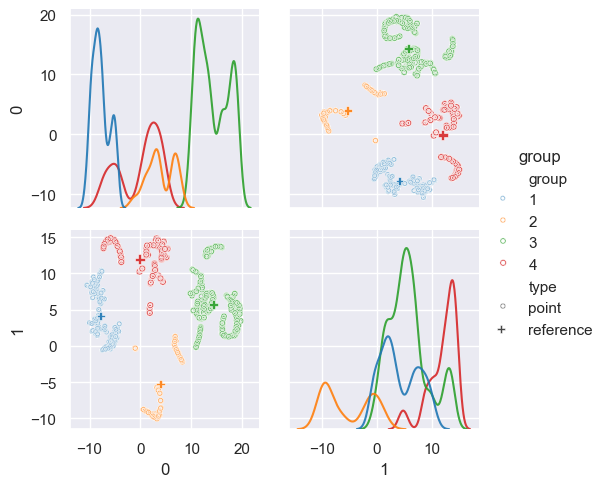

In [16]:
plot_results_by=indices[-1]

cluster_id={0:'k_n',1:'c_n'}
G, ref_points=pipe.results.iloc[plot_results_by[0]].loc[cluster_id[plot_results_by[1]],'matrix results']
fig=plot_clusters(X=pipe.X,G=G,ref_points=ref_points,grid=None)

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



(0.6521564420921816, 0.0012497192798560396, 0.012584886257645646)

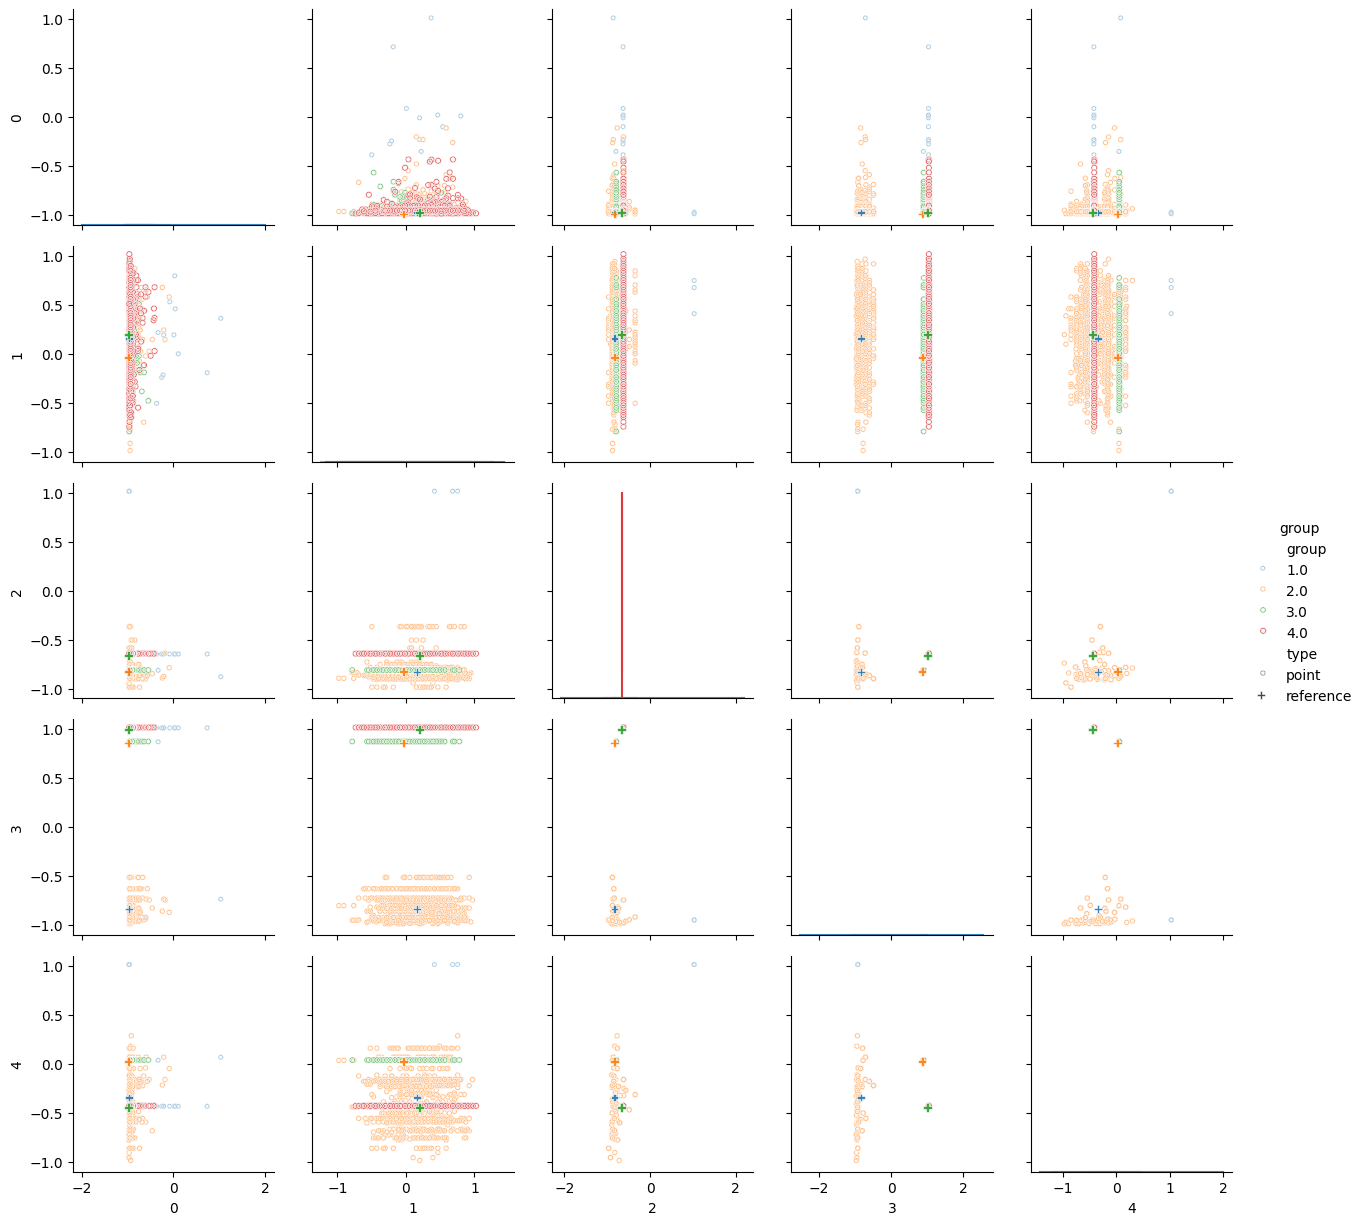

In [5]:
from sklearn.cluster import HDBSCAN
from modules.indices import internal_indices

pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='original',normas=normas)
hdb = HDBSCAN(min_cluster_size=20,store_centers='centroid')
hdb.fit(pipe.X)
G_=encode_array(hdb.labels_)
fig=plot_clusters(X=pipe.X,G=G_,ref_points=hdb.centroids_,grid=None)
db, dn, ch = internal_indices(pipe.X, G_[:,1:], pipe.normas[0], pipe.cov_i, hdb.centroids_)
db, dn, ch

calculating umap embedding


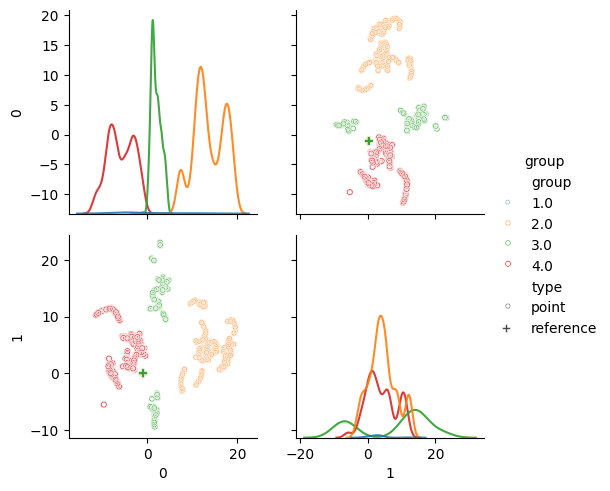

In [6]:
pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='umap',normas=normas)

fig=plot_clusters(X=pipe.X,G=G_,ref_points=hdb.centroids_,grid=None)

In [3]:
from sklearn.cluster import HDBSCAN
from modules.indices import internal_indices

encoder MLP information
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 36        
                                                                 
 dense_1 (Dense)             (None, 7)                 49        
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 85 (340.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
decoder MLP information
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 5)                 35        
           

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



(0.915854044547828, 1.9791992583057878e-05, 0.015228599303616377)

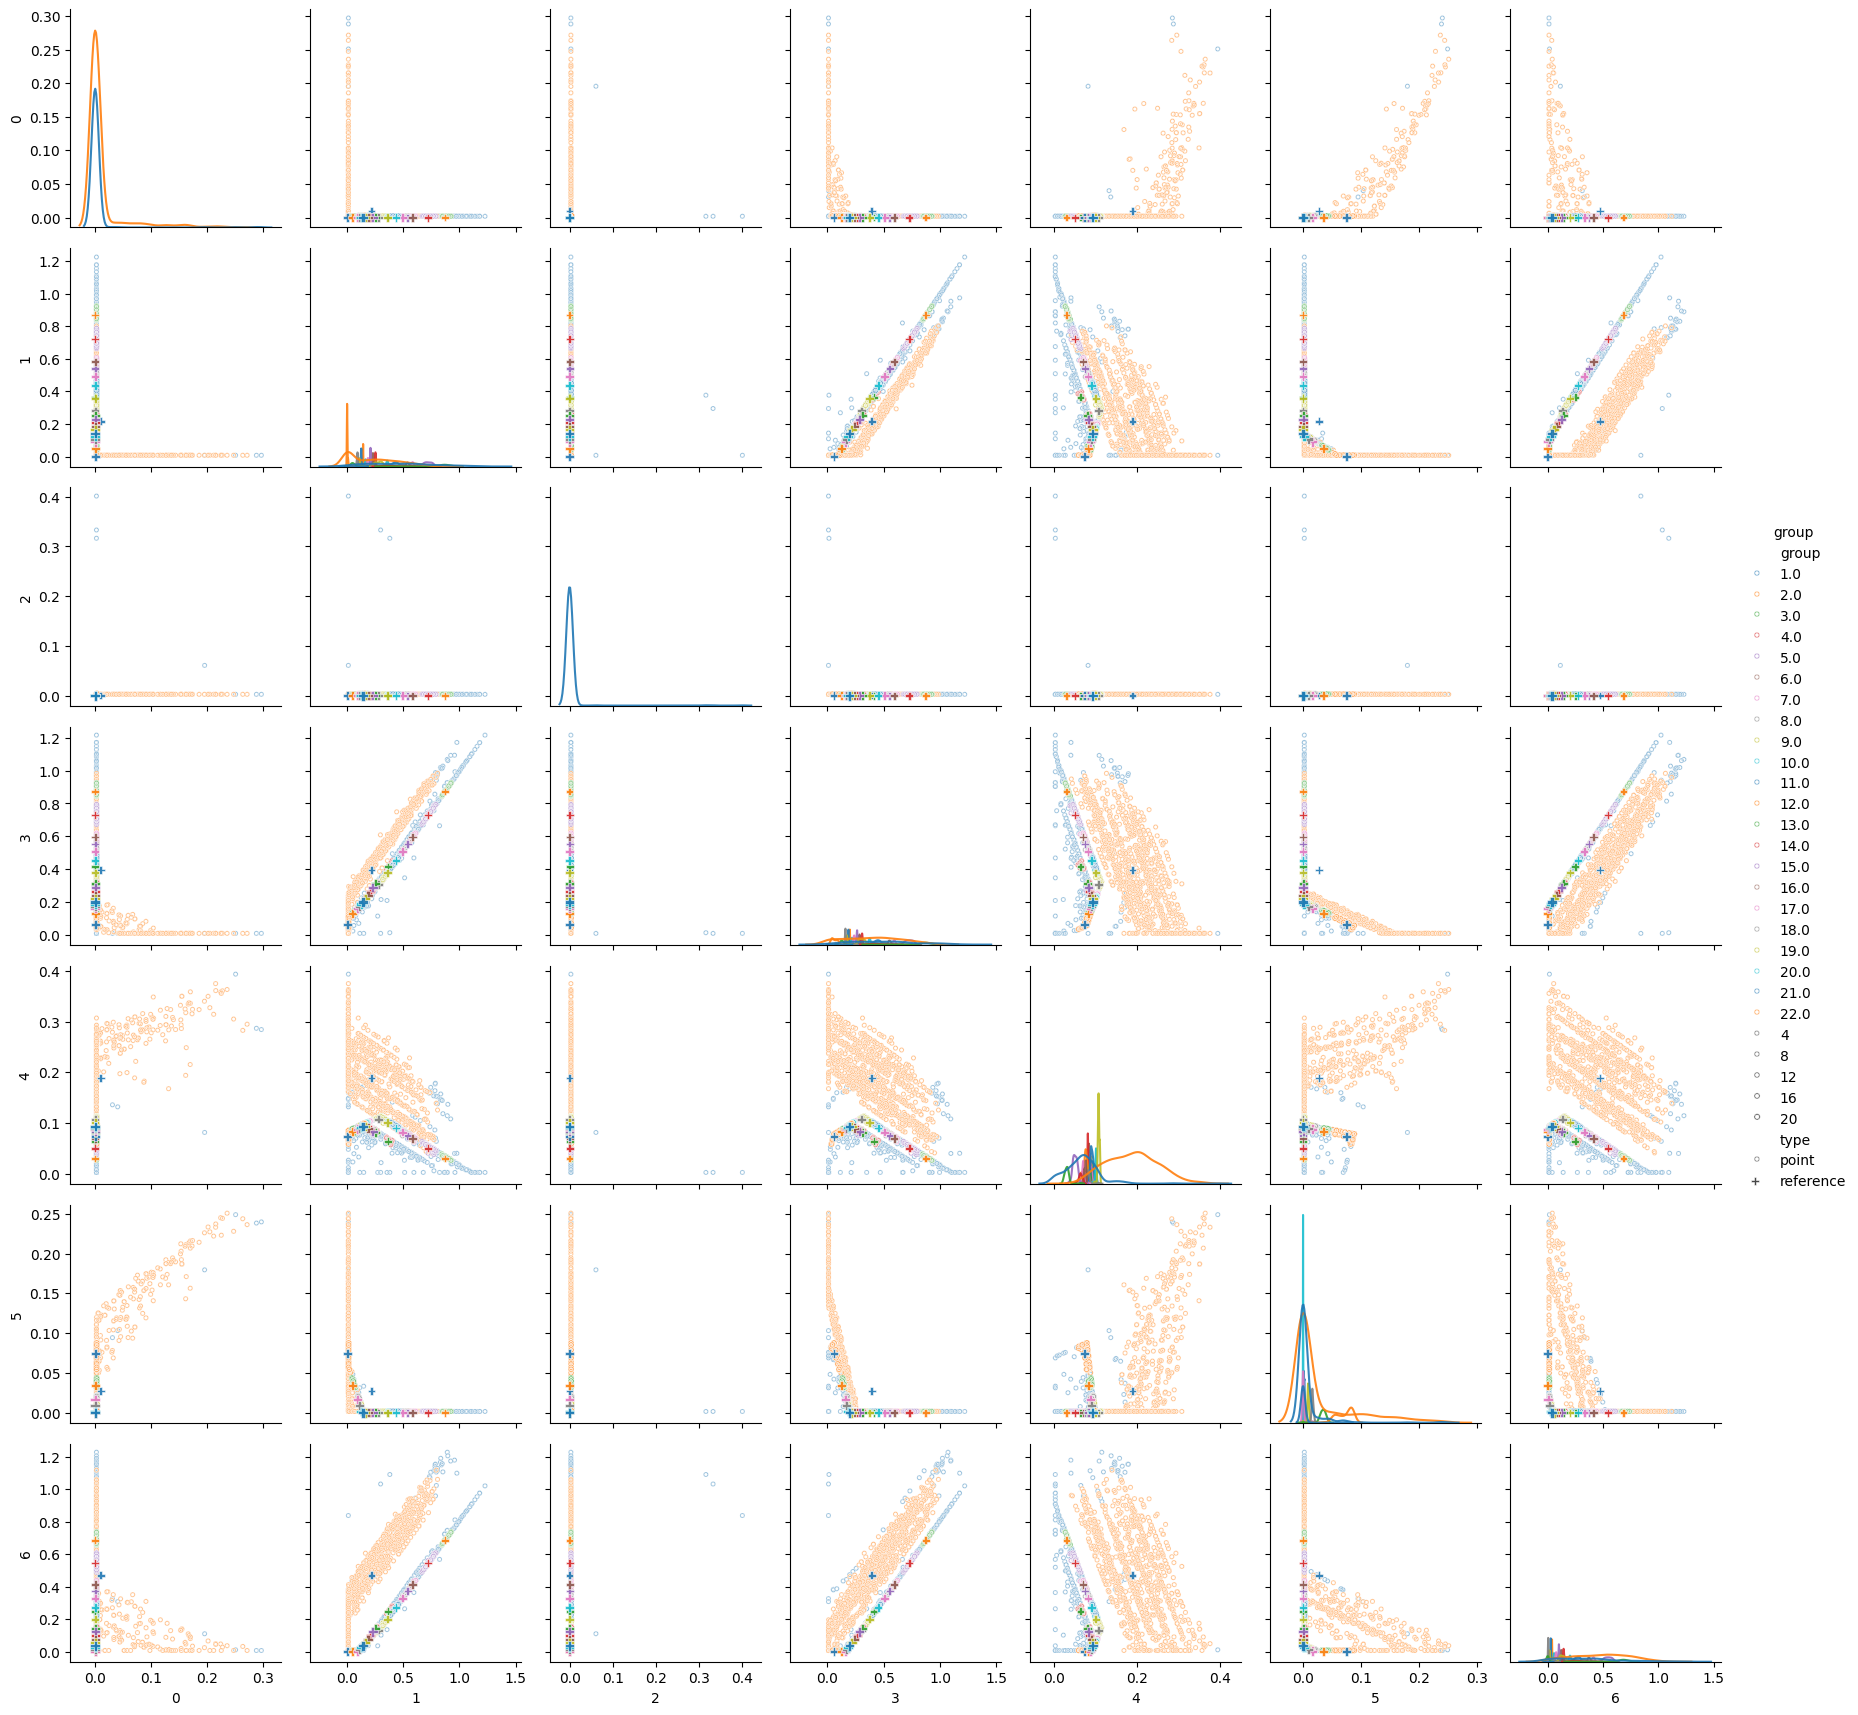

In [4]:
pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='encoded',normas=normas)
hdb = HDBSCAN(min_cluster_size=20,store_centers='centroid')
hdb.fit(pipe.X)
G_=encode_array(hdb.labels_)
fig=plot_clusters(X=pipe.X,G=G_,ref_points=hdb.centroids_,grid=None)
db, dn, ch = internal_indices(pipe.X, G_[:,1:], pipe.normas[0], pipe.cov_i, hdb.centroids_)
db, dn, ch

calculating umap embedding


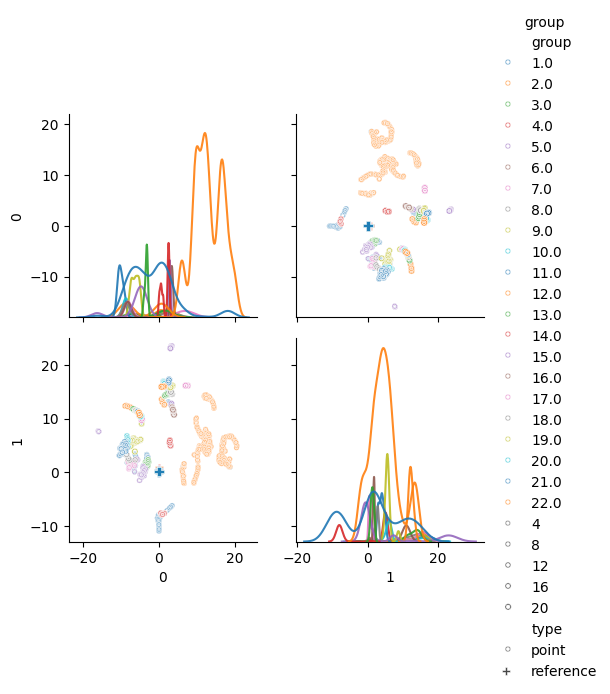

In [5]:
pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='umap',normas=normas)

fig=plot_clusters(X=pipe.X,G=G_,ref_points=hdb.centroids_,grid=None)

calculating umap embedding


(0.5282383271320619, 1.809306071159469e-05, 0.05313667085311891)

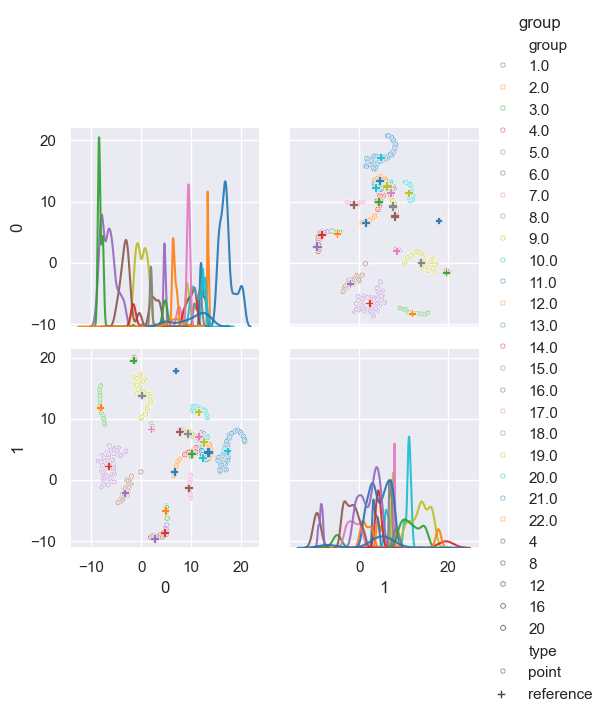

In [84]:
pipe=ClusterProblem(results_path,figs_path,filename,x_treatment='umap',normas=normas)
hdb = HDBSCAN(min_cluster_size=20,store_centers='centroid')
hdb.fit(pipe.X)
G_=encode_array(hdb.labels_)
fig=plot_clusters(X=pipe.X,G=G_,ref_points=hdb.centroids_,grid=None)
db, dn, ch = internal_indices(pipe.X, G_[:,1:], pipe.normas[0], pipe.cov_i, hdb.centroids_)
db, dn, ch

# how does density-based clustering work?
Density-based clustering is a type of unsupervised machine learning algorithm that groups together data points that are closely packed together in high-density regions. The algorithm works by defining a neighborhood around each data point and then grouping together data points that have a high density of neighbors.

One of the advantages of density-based clustering is that it can identify clusters of arbitrary shape and size, unlike other clustering algorithms such as k-means, which assume that clusters are spherical and have a fixed size. Density-based clustering is also robust to noise and outliers, since it only considers data points that are in high-density regions.

However, density-based clustering can be sensitive to the choice of parameters. If these parameters are not chosen carefully, the algorithm may fail to identify meaningful clusters or may group together data points that should be in separate clusters.

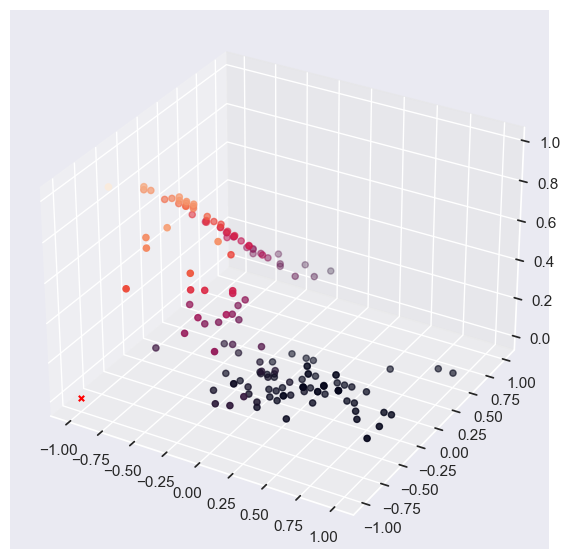

In [20]:
import matplotlib.pyplot as plt

pipe=ClusterProblem(results_path,figs_path,'iris',x_treatment='original',normas=normas)
pipe.do_grid(n_intervals=None)

norma_i=2

# visualize density
radius=lambda r: 1/(4*r**2); ra=0.3
a=np.apply_along_axis(lambda x: np.exp(-radius(ra) * x), 0, pipe.D_GridToX[norma_i])


centroid_ix=0
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(pipe.X[:,0],pipe.X[:,1],a[centroid_ix],c=a[centroid_ix])

ax.scatter3D(pipe.grid[centroid_ix,0],pipe.grid[centroid_ix,1],[0],c='red',marker='x',s=15)

In [ ]:
import plotly.graph_objects as go

norma_i=0

fig = go.Figure()

fig.add_scatter3d(x=X[:,0], y=X[:,1], z=X[:,2],
                  mode='markers',
                  marker=dict(size=5,color='mediumblue'), name='data points')

fig.add_scatter3d(x=grid[:,0], y=grid[:,1], z=grid[:,2],
                  mode='markers', marker=dict(size=5, color='purple'), name='grid points')

# tight layout
fig.update_layout(title_text='naive classes with norm %s: ir cambiando el punto de referencia'%normas[norma_i],
                  showlegend=False, margin=dict(l=0, r=0, t=40, b=0))
fig.show()

In [ ]:
# 1. Naive boxes clustering
#G, G_ref_points = pipe.do_cluster(naive_boxes, n_groups=3)
#G, G_ref_points = pipe.do_cluster(naive_kn, k_n=70)

# 2. Density substraction clustering
#G, G_ref_points = pipe.do_cluster(density_substraction, ra=0.3, kind='mountain', stop_criteria='unique_centroids', only_centroids=True)
#G, G_ref_points = pipe.do_cluster(density_substraction, ra=0.2,kind='substractive', stop_criteria='unique_centroids', only_centroids=False)

# 3. Hard k-means clustering
# Randomly select centroid start points, uniformly distributed across the domain of the dataset
#G, G_ref_points = pipe.do_cluster(kn_HardCluster, init='random', k_n=3, tol=1e-3)
# Previously selected points as centroids
#G, G_ref_points = pipe.do_cluster(kn_HardCluster, init='centroids', centroids=[np.array(pipe.X[refs]) for refs in G_ref_points], tol=1e-3)

# 4. Fuzzy k-means clustering
#G, G_ref_points = pipe.do_cluster(kn_FuzzyCluster, k_n=3, tol=1e-3, m=2)

In [ ]:
# readme, requirements.txt: funcionalidad de todo: main (entradas al sistema: archivo de datos), funciones en carpeta src,
# path automatico
# ejm. santiago hincapie, alejandro murillo
# documentar cada funcion y el codigo

In [ ]:
# 5 tipos de clustering en Rn con iris dataset
# 1. leer el archivo: preguntar tipo de archivo (csv,txt,json,xlsx,xls), almacenarlo.
# 1.a. variables categoricas a numericas: crear columnas binarias - onehot encoding
# 2. clustering: matrices de distancias, cajas y k=ki vecinos
# 2.a. n_conjuntos: depende de la segmentacion, parametro default k
# 2.output. matriz Nxki con {0,1}
# - cuenta de a cuales grupos perteneces


In [ ]:
# densidad
# definir la forma del cluster
# subconjunto:
